In [42]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

# Загружаем датасет для EDA

In [2]:
with open("../data/final_dataset/list_dict_with_tasks.pkl", "rb") as file:
    loaded_list = pickle.load(file)

In [4]:
df = pd.DataFrame(loaded_list)
df = df.sort_values("id").reset_index(drop=True)

df.head()

,id,topic,subtopic,complexity_level,problem,solution,answer
0,30262,Алгебра и арифметика,Арифметика. Устный счет и т.п,2,"Из книги выпал кусок, первая страница которого...",,496 страниц (248 листов)
1,30289,Алгебра и арифметика,Четность и нечетность,2,Можно ли доску размером 5×5 заполнить доминошк...,"Общее количество клеток (25) не делится на 2, ...",Нельзя
2,30320,Комбинаторика,Правило произведения,2,Монету бросают трижды. Сколько разных последов...,,2<sup>3</sup> = 8 последовательностей
3,30321,Комбинаторика,Правило произведения,2,Каждую клетку квадратной таблицы 2×2 можно пок...,,16 = 2<sup>4</sup> раскрасок
4,30322,Комбинаторика,Правило произведения,2,Сколькими способами можно заполнить одну карто...,,3<sup>13</sup> способами


# Статистика по темам и уровням сложности

## Статистика по темам

In [35]:
df["topic"].value_counts(normalize=True)

topic
Алгебра и арифметика        0.482993
Комбинаторика               0.312925
Олимпиадные задачи          0.088435
Вероятность и статистика    0.081633
Математический анализ       0.034014
Name: proportion, dtype: float64

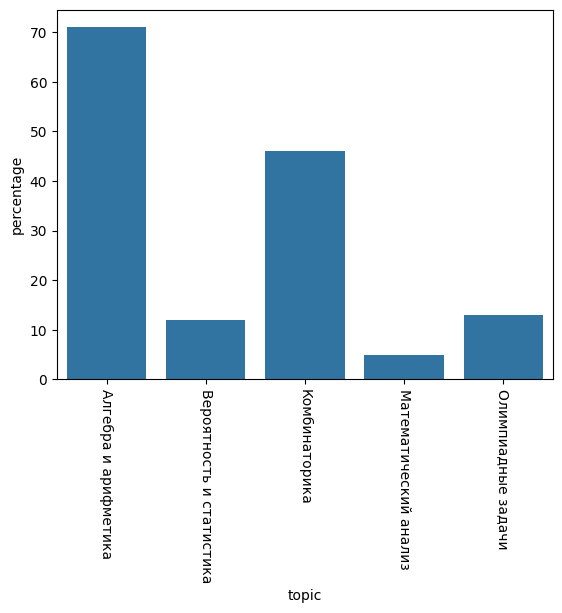

In [38]:
topic_df = df["topic"].value_counts(normalize=False).sort_index().reset_index()
topic_df.columns = ["topic", "percentage"]

sns.barplot(data=topic_df, x="topic", y="percentage")
plt.xticks(rotation=-90)
plt.show()

## Статистика по подтемам

In [48]:
df["subtopic"].value_counts(normalize=False)

subtopic
Сочетания и размещения                                   11
Задачи на проценты и отношения                            9
Правило произведения                                      7
Дискретное распределение                                  6
Десятичная система счисления                              6
Арифметика. Устный счет и т.п                             5
Четность и нечетность                                     4
Текстовые задачи (прочее)                                 4
Арифметическая прогрессия                                 4
Системы алгебраических нелинейных уравнений               4
Разложение на множители                                   4
Математическая статистика                                 3
Тригонометрические уравнения                              3
Турниры и турнирные таблицы                               3
Задачи на движение                                        3
Примеры и контрпримеры. Конструкции                       2
Тождественные преобразования   

## Статистика по уровням сложности

In [36]:
df["complexity_level"].value_counts(normalize=True)

complexity_level
3     0.238095
3+    0.224490
2     0.204082
2+    0.183673
3-    0.088435
2-    0.061224
Name: proportion, dtype: float64

<Axes: xlabel='complexity_level', ylabel='percentage'>

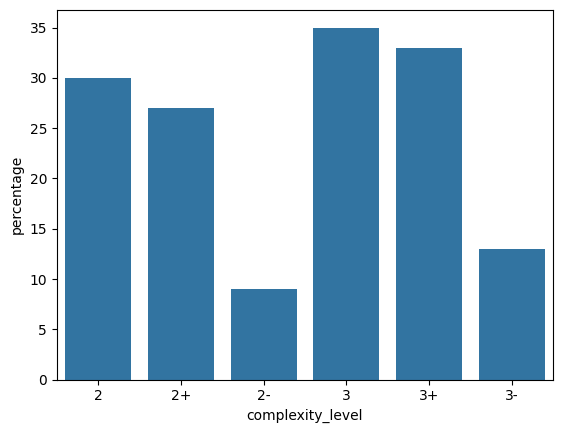

In [37]:
counts_df = df["complexity_level"].value_counts(normalize=False).sort_index().reset_index()
counts_df.columns = ["complexity_level", "percentage"]

sns.barplot(data=counts_df, x="complexity_level", y="percentage")

In [9]:
df["topic"].value_counts(normalize=True)

topic
Алгебра и арифметика        0.482993
Комбинаторика               0.312925
Олимпиадные задачи          0.088435
Вероятность и статистика    0.081633
Математический анализ       0.034014
Name: proportion, dtype: float64

In [10]:
df["subtopic"].value_counts(normalize=True)

subtopic
Сочетания и размещения                    0.074830
Задачи на проценты и отношения            0.061224
Правило произведения                      0.047619
Дискретное распределение                  0.040816
Десятичная система счисления              0.040816
                                            ...   
Количество и сумма делителей числа        0.006803
Рациональные уравнения                    0.006803
Рациональные и иррациональные числа       0.006803
Задачи с неравенствами. Разбор случаев    0.006803
Числовые неравенства. Сравнения чисел     0.006803
Name: proportion, Length: 71, dtype: float64